<a href="https://colab.research.google.com/github/pmop/fft-pyimpl/blob/master/DFT_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Definição

## $$ X[k] = \sum_{n=0}^{n-1} x(t)e^{-i2\pi{tk}/n} $$


Segue a DFT:

In [ ]:
import numpy as np
from matplotlib import pyplot
import time

In [ ]:
# DFT arranjada para cálculo vetorial
def dft(x):
    # N é o tamanho do vetor
    N = len(x)
    # Converte o vetor para uma estrutura de array do numpy, converte os valores de x(t) para float
    x = np.asarray(x, dtype=float)
    # Cria uma matriz de dimensão Nx1
    n = np.arange(N)
    k = n.reshape((N,1))
    
    # Exponencial 
    M = np.exp(-2j * np.pi * k * n/N)
    # Produto interno dos vetores
    return np.dot(M,x)

(1) Considere a sequência $x[n] = [6, 8, 5, 4, 5, 6]$. Implemente o algoritmo da transformada
de Fourier Discreta (DFT) para analisar o espectro frequencial desse sinal e valide os
resultados com a função fft do MATLAB.

R:

Implementação acima.


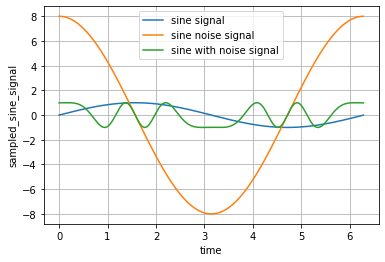

In [ ]:
sinal = [6, 8, 5, 4, 5, 6]

dft(sinal)
dt = 0.01
t = np.arange(0, 2*np.pi, dt)
continuous_sine_signal = 2*np.sin(np.pi*0.5 + t)
sine_signal = np.vectorize(lambda x: np.sin(x))
sampled_sine_signal = sine_signal(t)

noise = np.vectorize(lambda x: 8*np.sin(np.pi*0.5 + x))
snoise = noise(t)

sampled_sine_signal_w_noise = sine_signal(noise(t))

fig, ax = pyplot.subplots()
line1 = ax.plot(t, sampled_sine_signal, label='sine signal')
line2 = ax.plot(t, snoise, label='sine noise signal')
line3 = ax.plot(t, sampled_sine_signal_w_noise, label='sine with noise signal')
ax.set_xlabel('time')
ax.set_ylabel('sampled_sine_signal')
ax.grid(True)
ax.legend()
pyplot.show()

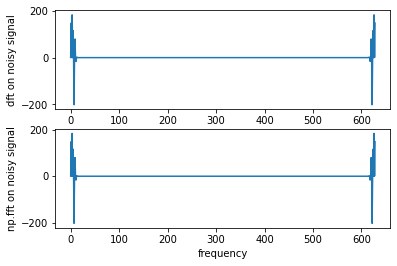

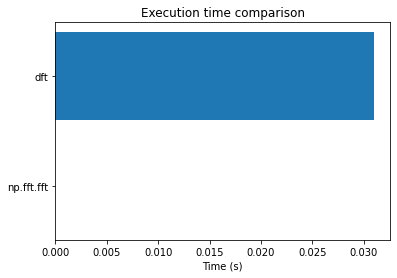

In [ ]:
tt = time.time()
fq_sampled_sine_signal_w_noise_dft = np.real(dft(sampled_sine_signal_w_noise))
t_dft = np.round(time.time() - tt, 3)
tt = time.time()
fq_sampled_sine_signal_w_noise_npdft = np.real(np.fft.fft(sampled_sine_signal_w_noise))
t_np_dft = np.round(time.time() - tt, 3)

fig, axs = pyplot.subplots(2, 1)
axs[0].plot(fq_sampled_sine_signal_w_noise_dft)
axs[1].plot(fq_sampled_sine_signal_w_noise_npdft)
axs[1].set_xlabel('frequency')
axs[0].set_ylabel('dft on noisy signal')
axs[1].set_ylabel('np.fft on noisy signal')
pyplot.show()

subjects = ('dft', 'np.fft.fft')
y_pos = np.arange(len(subjects))
performance = np.array([t_dft, t_np_dft])
fig, ax = pyplot.subplots()
ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(subjects)
ax.invert_yaxis()
ax.set_xlabel('Time (s)')
ax.set_title('Execution time comparison')
pyplot.show()

In [ ]:
# Comparando com a fft do numpy

np.allclose(dft(sinal), np.fft.fft(sinal))

True

(2) Implemente também a transformada discreta inversa de Fourier (IDFT) para restaurar
a sequência original.

### Definição da IDFT

### $$x[n] = \frac{1}{N}\sum_{k=0}^{N-1}X[k]\cdot e^{i2\pi kn/N}$$

In [ ]:
def idft(X):
    # Mesmo tratamento de entrada anterior
    N = len(X)
    X = np.asarray(X)
    n = np.arange(N)
    k = n.reshape((N,1))
    # i2 pi kn/N
    M = np.exp(2j * np.pi * k * n/N)
    return (1/N) * np.dot(M,X)

In [ ]:
# Restaurando sinal

sinal_freq = dft(sinal)

sinal_rest = idft(sinal_freq)

print(sinal_rest)

[6.-8.28966525e-15j 8.-2.14643118e-15j 5.+5.92118946e-16j
 4.+2.03540888e-15j 5.+2.59052039e-15j 6.+6.95739762e-15j]


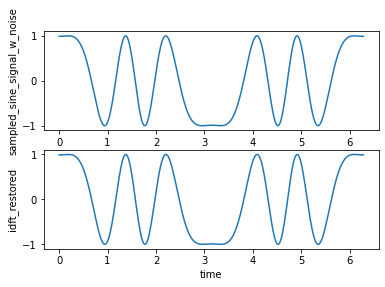

In [ ]:
dt = 0.01
t = np.arange(0, 2*np.pi, dt)
sampled_sine_signal_w_noise = sine_signal(noise(t))
fq_sampled_sine_signal_w_noise_npdft = np.real(np.fft.fft(sampled_sine_signal_w_noise))
idft_restored = np.real(idft(fq_sampled_sine_signal_w_noise_npdft))

fig, axs = pyplot.subplots(2, 1)
axs[0].plot(t, sampled_sine_signal_w_noise)
axs[1].plot(t, idft_restored)
axs[1].set_xlabel('time')
axs[0].set_ylabel('sampled_sine_signal_w_noise')
axs[1].set_ylabel('idft_restored')
pyplot.show()

3. Implemente o algoritmo de raiz de 2 com decimação no tempo (Radix-2) da transformada de Rápida de Fourier (Fast Fourier Transform - FFT) para analisar o espectro
frequencial desse sinal e valide os resultados com a função fft do MATLAB.


R:

Fazendo uma série de enxpansões e reduções, podemos chegar nessa igualdade:

## $$X[k] - \sum_{n=0}^{N-1} x[n]e^{\frac{-i2\pi kn}{N}} = $$ 


## $$
\sum_{r=1}^{\frac{N}{2}-1} x[2r]e^{\frac{-i2\pi k2r}{N}} + e^{\frac{-i2\pi k}{N}}\sum_{r=1}^{\frac{N}{2}-1} x[2r+1]e^{\frac{-i2\pi k(2r+1)}{N}}
$$


In [ ]:
def radix2_dft(x):
    N = x.shape[0]
    assert N%2 == 0, f'{N} Nao e uma potencia de 2'
    if N == 2: return dft(x)
    else:
        x = np.asarray(x, dtype=float)
        # sintaxe de partição de arrays em python: a[start:stop:step]
        # chama a radix 2 dft recursivamente na parte par do sinal
        x_par = radix2_dft(x[::2])
        # chama a radix 2 dft recursivamente na parte impar do sinal
        x_impar = radix2_dft(x[1::2])
        c = np.exp(-2j * np.pi * np.arange(N)/N)
        # concatena os resultados retorna
        return np.concatenate([x_par + c[:int(N/2)] * x_impar,
                               x_par + c[int(N/2):] * x_impar])

In [ ]:
sinal = [6, 8, 5, 4, 5, 6, 5, 6]

np.allclose(radix2_dft(sinal), np.fft.fft(sinal))

True

No handles with labels found to put in legend.


(512,)


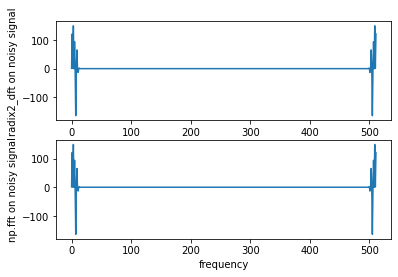

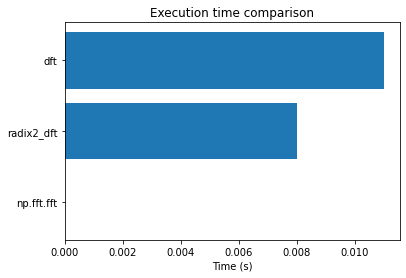

In [ ]:
dt = 0.01
mq = np.linspace(0, 2*np.pi, 512)
#k = t[0:576] # Cut down to the closest square number
sssignal_w_noise = sine_signal(noise(mq))

print(mq.shape)

mt = time.time()
fq_sampled_sine_signal_w_noise_dft = np.real(radix2_dft(sssignal_w_noise))
t_radix2_dft = np.round(time.time() - mt, 3)
mtt = time.time()
fq_sampled_sine_signal_w_noise_npdft = np.real(np.fft.fft(sssignal_w_noise))
t_np_dft = np.round(time.time() - mtt, 3)

fig, axs = pyplot.subplots(2, 1)
axs[0].plot(fq_sampled_sine_signal_w_noise_dft)
axs[1].plot(fq_sampled_sine_signal_w_noise_npdft)
axs[1].set_xlabel('frequency')
axs[0].set_ylabel('radix2_dft on noisy signal')
axs[1].set_ylabel('np.fft on noisy signal')
ax.grid(True)
ax.legend()
pyplot.show()

subjects = ('dft', 'radix2_dft', 'np.fft.fft')
y_pos = np.arange(len(subjects))
performance = np.array([t_dft, t_radix2_dft, t_np_dft])
fig, ax = pyplot.subplots()
ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(subjects)
ax.invert_yaxis()
ax.set_xlabel('Time (s)')
ax.set_title('Execution time comparison')
pyplot.show()

4. Implemente o algoritmo de raiz de 3 com decimação no tempo (Radix-3) da transformada de Rápida de Fourier (Fast Fourier Transform - FFT) para analisar o espectro
frequencial desse sinal e valide os resultados com a função fft do MATLAB.

In [ ]:
# TODO